In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
patient_data = pd.read_csv('data.csv')
patient_data

,PatientID,Age,Gender,HeartRate,BloodPressure,RespiratoryRate,BodyTemperature,ActivityLevel,OxygenSaturation,SleepQuality,StressLevel,Timestamp
0,1,69,Male,60.993428,130/85,15,98.885236,resting,95.0,excellent,low,2024-04-26 17:28:55.286711
1,2,32,Male,98.723471,120/80,23,98.281883,walking,97.0,good,high,2024-04-26 17:23:55.286722
2,3,78,Female,82.295377,130/85,13,98.820286,resting,98.0,fair,high,2024-04-26 17:18:55.286726
3,4,38,Female,80.000000,111/78,19,98.412594,running,98.0,poor,moderate,2024-04-26 17:13:55.286728
4,5,41,Male,87.531693,120/80,14,99.369871,resting,98.0,good,low,2024-04-26 17:08:55.286731
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,61,Male,85.077820,135/76,22,98.243780,walking,NaN,poor,moderate,2024-04-25 00:13:55.288556
496,497,62,Female,99.925508,130/85,14,98.859537,running,97.0,excellent,moderate,2024-04-25 00:08:55.288558
497,498,49,Female,98.619323,120/80,16,98.228169,running,99.0,good,moderate,2024-04-25 00:03:55.288560
498,499,62,Male,99.248763,130/85,14,97.185764,resting,NaN,poor,low,2024-04-24 23:58:55.288562


In [3]:
for col in patient_data.columns:
    if (patient_data[col]
            .isna().sum() > 0):
        print(col, patient_data[col].isna().sum())

BodyTemperature 18
OxygenSaturation 163


##### Almost 2/5th of data is NA so fill them with average rather than dropping them

In [4]:
median_body_temp = patient_data['BodyTemperature'].median()
median_oxygen_sat = patient_data['OxygenSaturation'].median()

patient_data['BodyTemperature'].fillna(median_body_temp, inplace=True)
patient_data['OxygenSaturation'].fillna(median_oxygen_sat, inplace=True)

/var/folders/4n/gbrmm4bs17ldvh4_ypty4z5c0000gn/T/ipykernel_16599/2869541021.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  patient_data['BodyTemperature'].fillna(median_body_temp, inplace=True)
/var/folders/4n/gbrmm4bs17ldvh4_ypty4z5c0000gn/T/ipykernel_16599/2869541021.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [5]:
patient_data.columns

Index(['PatientID', 'Age', 'Gender', 'HeartRate', 'BloodPressure',
       'RespiratoryRate', 'BodyTemperature', 'ActivityLevel',
       'OxygenSaturation', 'SleepQuality', 'StressLevel', 'Timestamp'],
      dtype='object')

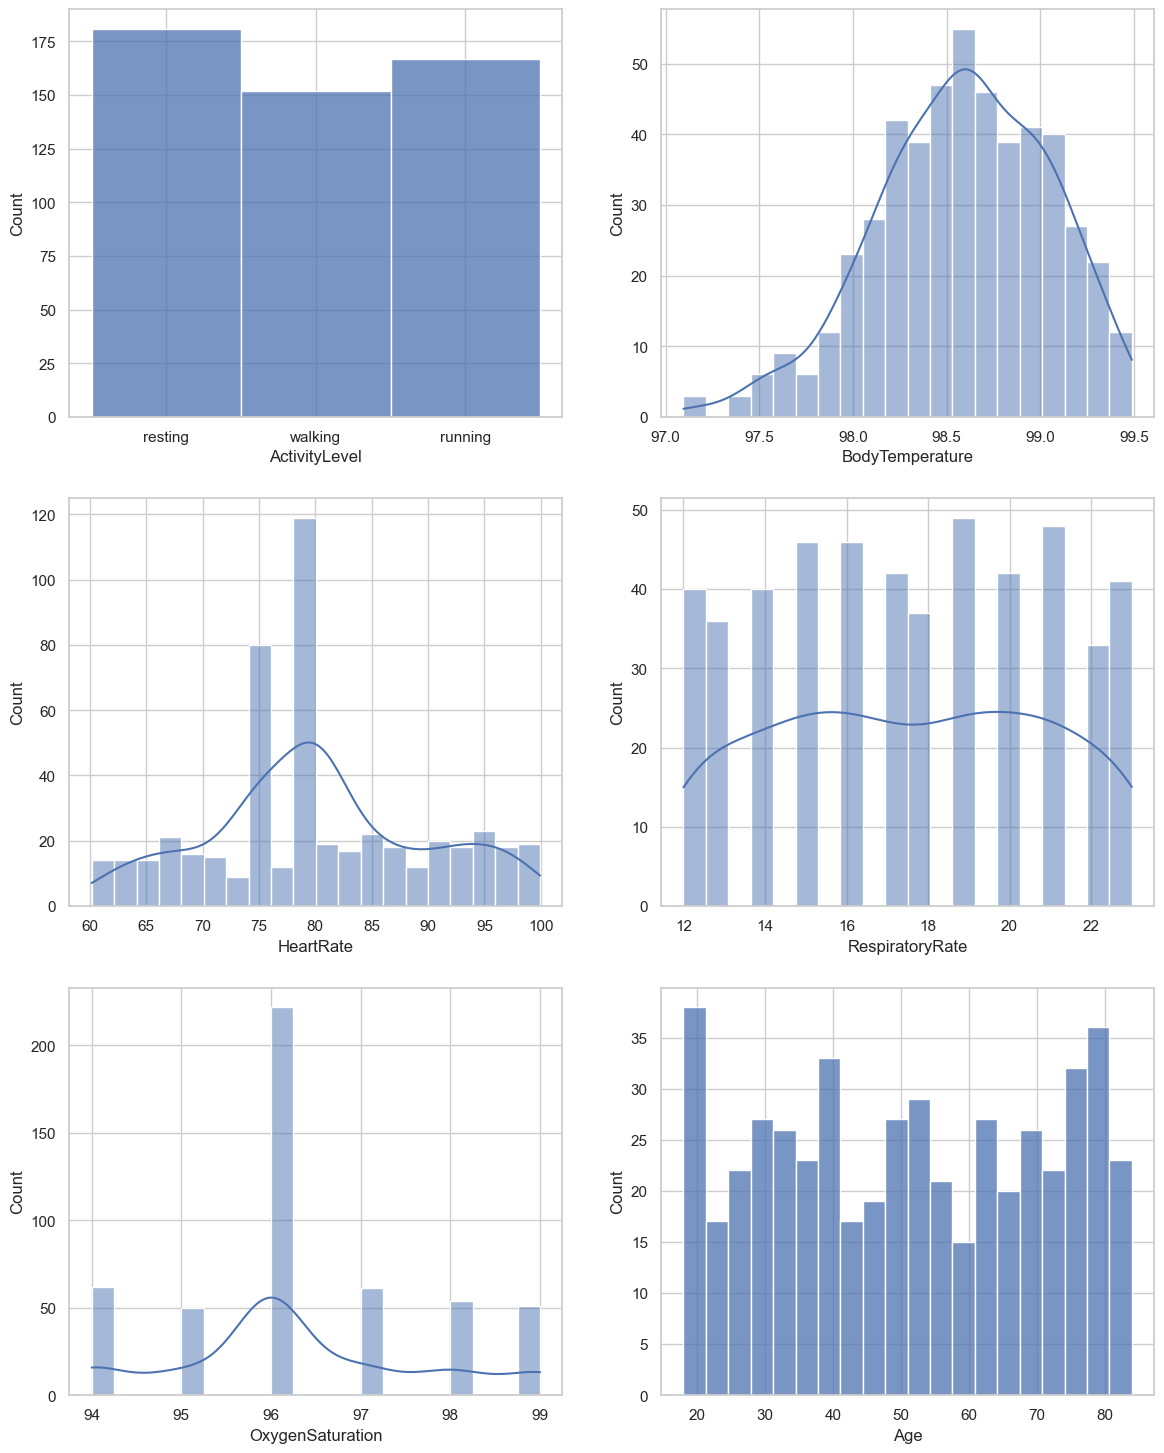

In [6]:
sns.set(style='whitegrid', palette='deep')
fig, ax = plt.subplots(3, 2, figsize=(14, 18))
sns.histplot(patient_data['ActivityLevel'], ax=ax[0, 0], bins=20, kde=False)
sns.histplot(patient_data['BodyTemperature'], ax=ax[0, 1], bins=20, kde=True)
sns.histplot(patient_data['HeartRate'], ax=ax[1, 0], bins=20, kde=True)
sns.histplot(patient_data['RespiratoryRate'], ax=ax[1, 1], bins=20, kde=True)
sns.histplot(patient_data['OxygenSaturation'], ax=ax[2, 0], bins=20, kde=True)
sns.histplot(patient_data['Age'], ax=ax[2, 1], bins=20, kde=False)

plt.show()

In [7]:
patient_data.describe()

,PatientID,Age,HeartRate,RespiratoryRate,BodyTemperature,OxygenSaturation
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,51.146000,80.131613,17.524000,98.584383,96.296000
std,144.481833,19.821566,9.606273,3.382352,0.461502,1.408671
min,1.000000,18.000000,60.169259,12.000000,97.094895,94.000000
25%,125.750000,34.000000,75.000000,15.000000,98.281793,96.000000
50%,250.500000,51.000000,80.000000,17.500000,98.609167,96.000000
75%,375.250000,69.000000,86.276413,20.000000,98.930497,97.000000
max,500.000000,84.000000,99.925508,23.000000,99.489150,99.000000


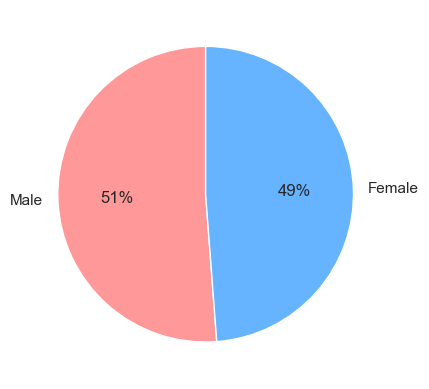

In [15]:
gender_destribution = patient_data['Gender'].value_counts()
plt.pie(gender_destribution, autopct='%.0f%%', labels=gender_destribution.index,
        startangle=90, colors=['#ff9999', '#66b3ff'])
plt.show()

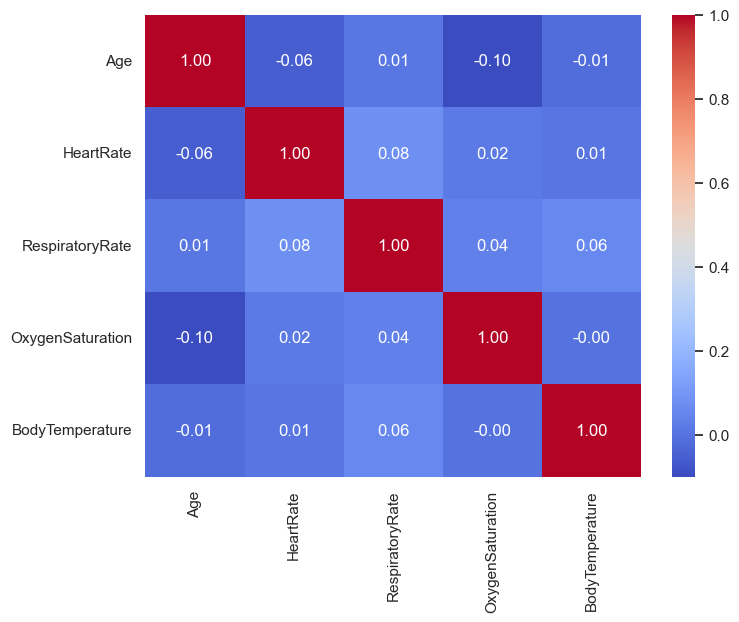

In [25]:
corr_matrix = patient_data[['Age', 'HeartRate',
                            'RespiratoryRate', 'OxygenSaturation', 'BodyTemperature']].corr()
ax = plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

##### The correlation matrix shows no strong correlations between the variables, as all the values are close to zero. Specifically, none of the health metrics (Age, Heart Rate, Respiratory Rate, Body Temperature, and Oxygen Saturation) display a strong positive or negative linear relationship with one another in this particular dataset. It suggests that, for this group of individuals, changes in one metric are not strongly associated with changes in the others.

In [28]:
patient_data[['systolic', 'diastolic']] = patient_data['BloodPressure'].str.split('/', expand=True).astype(int)

In [29]:
patient_data

,PatientID,Age,Gender,HeartRate,BloodPressure,RespiratoryRate,BodyTemperature,ActivityLevel,OxygenSaturation,SleepQuality,StressLevel,Timestamp,systolic,diastolic
0,1,69,Male,60.993428,130/85,15,98.885236,resting,95.0,excellent,low,2024-04-26 17:28:55.286711,130,85
1,2,32,Male,98.723471,120/80,23,98.281883,walking,97.0,good,high,2024-04-26 17:23:55.286722,120,80
2,3,78,Female,82.295377,130/85,13,98.820286,resting,98.0,fair,high,2024-04-26 17:18:55.286726,130,85
3,4,38,Female,80.000000,111/78,19,98.412594,running,98.0,poor,moderate,2024-04-26 17:13:55.286728,111,78
4,5,41,Male,87.531693,120/80,14,99.369871,resting,98.0,good,low,2024-04-26 17:08:55.286731,120,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,61,Male,85.077820,135/76,22,98.243780,walking,96.0,poor,moderate,2024-04-25 00:13:55.288556,135,76
496,497,62,Female,99.925508,130/85,14,98.859537,running,97.0,excellent,moderate,2024-04-25 00:08:55.288558,130,85
497,498,49,Female,98.619323,120/80,16,98.228169,running,99.0,good,moderate,2024-04-25 00:03:55.288560,120,80
498,499,62,Male,99.248763,130/85,14,97.185764,resting,96.0,poor,low,2024-04-24 23:58:55.288562,130,85


<Axes: xlabel='ActivityLevel', ylabel='OxygenSaturation'>

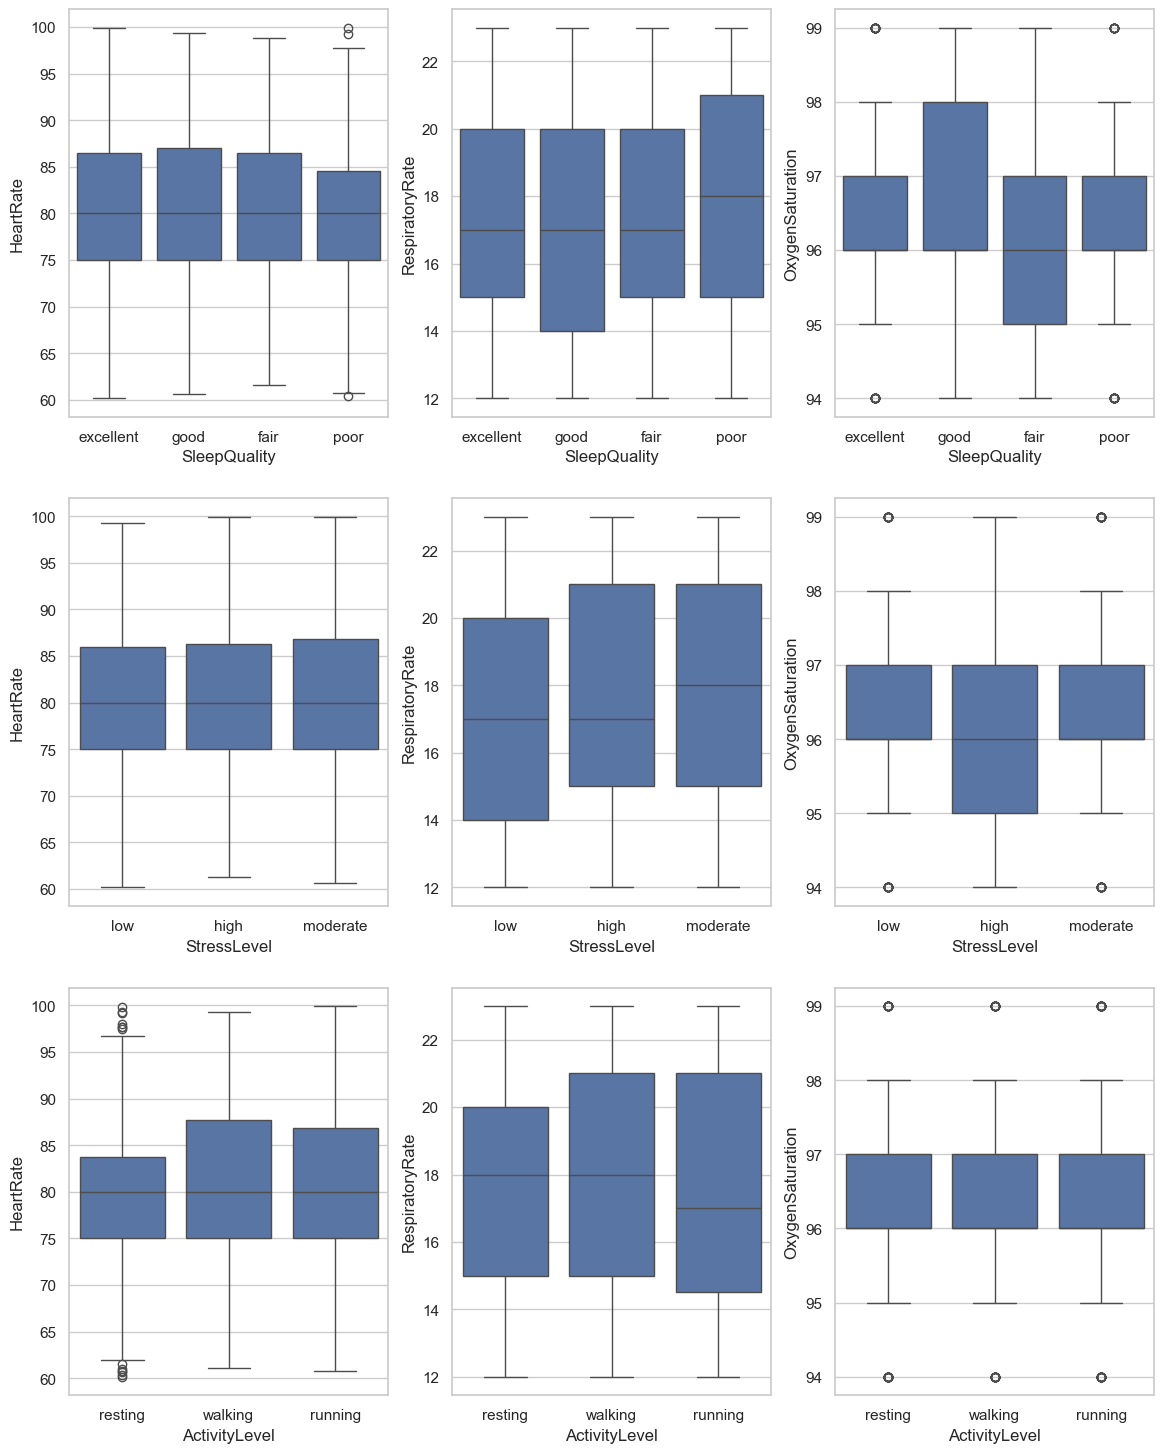

In [39]:
#affect of gender 
fig, ax = plt.subplots(3, 3, figsize=(14, 18))
sns.boxplot(x='SleepQuality', y='HeartRate',data=patient_data,ax=ax[0,0])
sns.boxplot(x='SleepQuality', y='RespiratoryRate',data=patient_data,ax=ax[0,1])
sns.boxplot(x='SleepQuality', y='OxygenSaturation',data=patient_data,ax=ax[0,2])

sns.boxplot(x='StressLevel', y='HeartRate',data=patient_data,ax=ax[1,0])
sns.boxplot(x='StressLevel', y='RespiratoryRate',data=patient_data,ax=ax[1,1])
sns.boxplot(x='StressLevel', y='OxygenSaturation',data=patient_data,ax=ax[1,2])

sns.boxplot(x='ActivityLevel', y='HeartRate',data=patient_data,ax=ax[2,0])
sns.boxplot(x='ActivityLevel', y='RespiratoryRate',data=patient_data,ax=ax[2,1])
sns.boxplot(x='ActivityLevel', y='OxygenSaturation',data=patient_data,ax=ax[2,2])


##### for sleep levels:
                    1.Heart rate: seems quite consistent
                    2.RespiratoryRate: for poor sleep median is higher compared to other cases
                    3.O2: seems all over the place
##### for stress level:
                    1.Heart rate: seems quite consistent
                    2.RespiratoryRate: -slightly higher median compare to other cases for moderate stress
                                       -for high stress skewness towards left
                    2.O2: seems all over the place
        
                                        